# Computer vision and object detection
coumputer vision API를 사용해서 이미지속에 있는 사물을 인식하느 데모 입니다.
네트워크 통신을 위해서 requests 패키지를 import 합니다.

In [3]:
import requests

이미지처리를 위해서 matplotlib.pyplot,  Image,   BytesIO 세 개의 패키지를 import 합니다.

matplotlib.pyplot는 import 할 때 시간이 조금 걸릴 수 있습니다. 

In [4]:
import matplotlib.pyplot as plt #차트그리기 모듈
from PIL import Image           # Python Imaging Library(라이브러리) PIL 모듈안의 image모듈을 가져오는것
from io import BytesIO          #이미지를 파일로서가 아닌 데이터로 가져오는 것

In [5]:
import json #json파일의 로딩 및 저장 할 수  있게 해줌

Subscription Key와 접속에 필요한 URL을 설정합니다.

In [6]:
subscription_key='234a97e32f8447c19fbf3836053ff32c'

In [7]:
vision_base_url = 'https://daeguaivision00.cognitiveservices.azure.com/vision/v2.0/'

In [8]:
analyze_url = vision_base_url + 'analyze'

In [9]:
image_url = 'https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fschool.jbedu.kr%2Ffiles%2Fhi01%2Fim%2F2019%2F07%2FS0000000665%2F3d89003a8e3c0eb693505ffda8c3e53a0f929bc6a6452888_0.jpg&f=1&nofb=1'

In [10]:
response = requests.get(image_url)

In [11]:
image = Image.open(BytesIO(response.content))

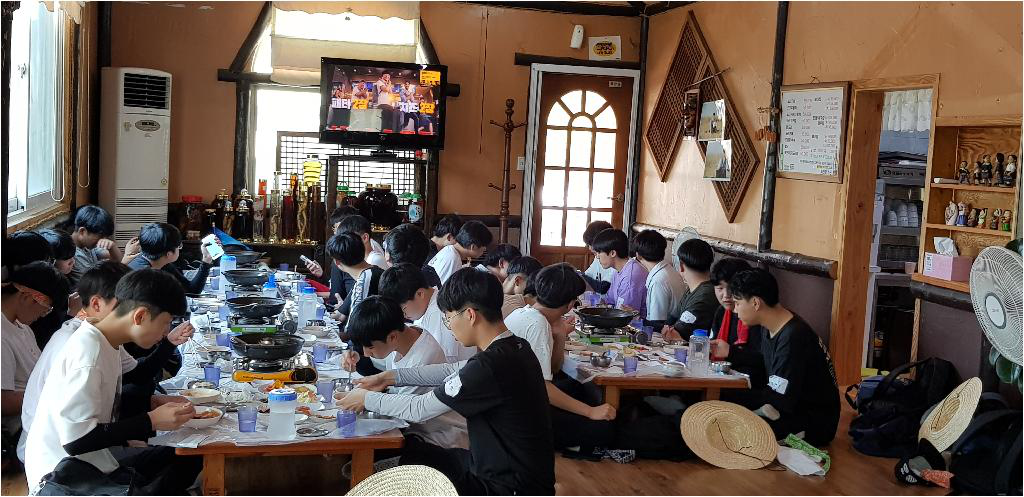

In [12]:
image

In [13]:
headers = {'Ocp-Apim-Subscription-Key': subscription_key }
params = {'visualFeatures':'Categories,Description,Color'}
data = {'url':image_url}

In [14]:
response = requests.post(analyze_url,
                         headers=headers,
                         params=params,
                         json=data)

In [15]:
analysis = response.json()

분석 결과 입니다. 분석결과에는 랜드마크를 비롯해서 인지한 개체들과 문장으로 구성된 결과가 포함 되어 있습니다.

In [16]:
analysis

{'categories': [{'name': 'people_many', 'score': 0.83984375}],
 'color': {'dominantColorForeground': 'Black',
  'dominantColorBackground': 'Brown',
  'dominantColors': ['Brown', 'Black', 'Grey'],
  'accentColor': '68412B',
  'isBwImg': False,
  'isBWImg': False},
 'description': {'tags': ['person',
   'indoor',
   'table',
   'sitting',
   'people',
   'man',
   'food',
   'group',
   'computer',
   'laptop',
   'eating',
   'woman',
   'young',
   'room',
   'desk',
   'bench',
   'restaurant',
   'kitchen',
   'pizza',
   'plate'],
  'captions': [{'text': 'a group of people sitting at a table',
    'confidence': 0.9855493150711578}]},
 'requestId': '684fa48c-1682-4b67-9920-59678acd4230',
 'metadata': {'height': 497, 'width': 1024, 'format': 'Jpeg'}}

In [21]:
analysis['description']['captions'][0]['text']

'a group of people sitting at a table'

# Object Detection

In [23]:
objectDetection_url = vision_base_url + 'detect'

In [24]:
object_image = 'https://www.newsmin.co.kr/news/wp-content/uploads/2021/05/05180000dddd-1-1536x904.jpg'

In [27]:
img = Image.open(BytesIO(requests.get(object_image).content))

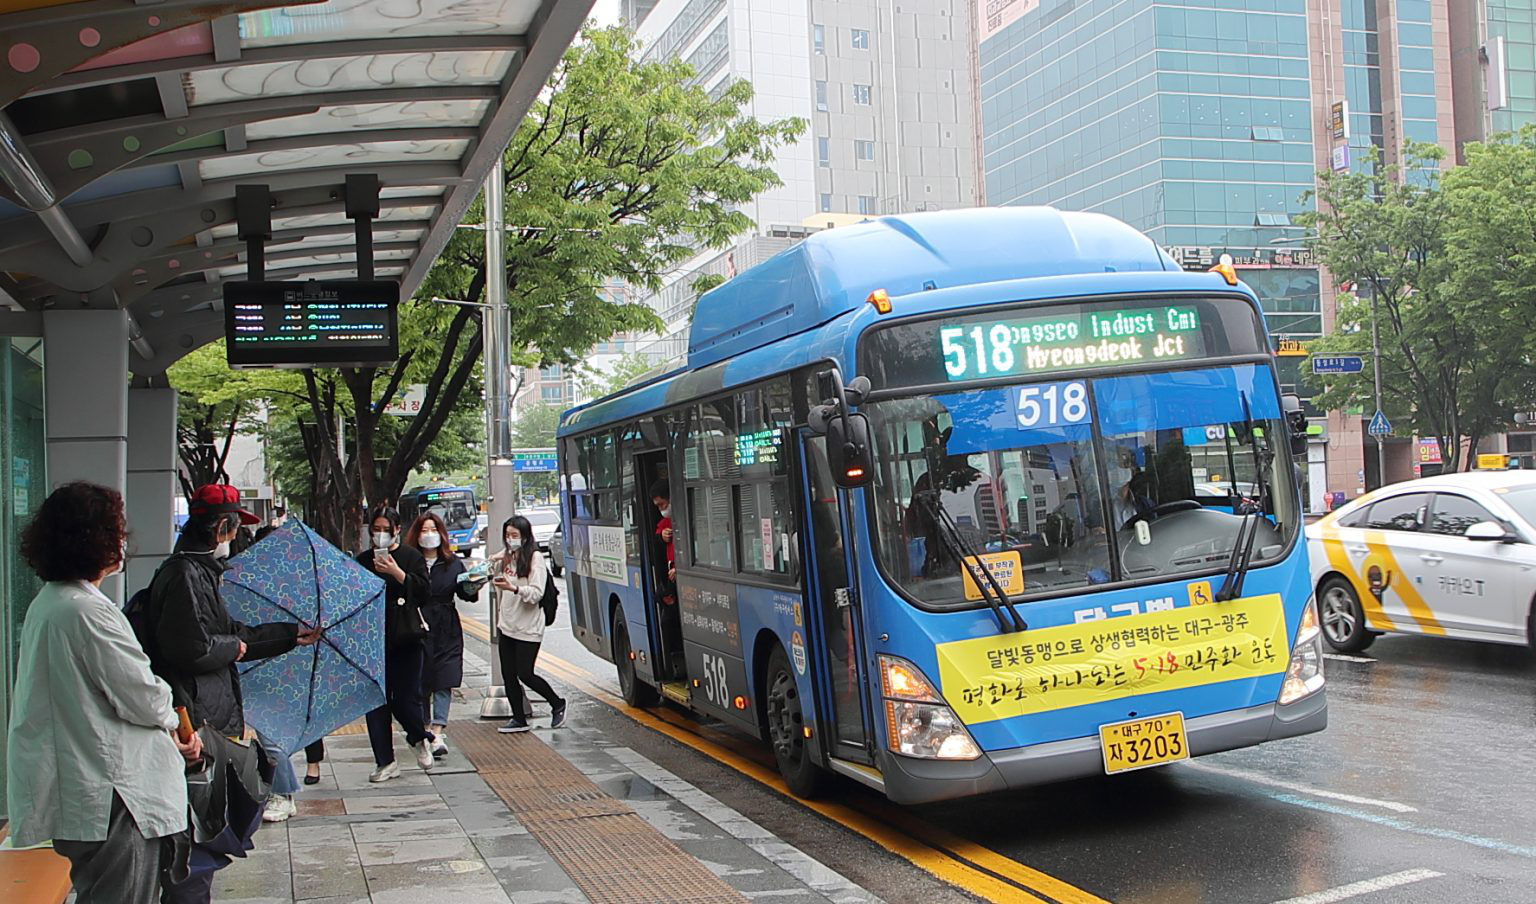

In [28]:
img

In [55]:
headers = {'Ocp-Apim-Subscription-Key': subscription_key}
data = {'url':object_image}

In [56]:
response = requests.post(objectDetection_url,
                         headers = headers,
                         json = data)

In [57]:
detectionResult = response.json()

In [58]:
detectionResult

{'objects': [{'rectangle': {'x': 1310, 'y': 474, 'w': 222, 'h': 193},
   'object': 'taxi',
   'confidence': 0.522,
   'parent': {'object': 'car',
    'confidence': 0.828,
    'parent': {'object': 'Land vehicle',
     'confidence': 0.848,
     'parent': {'object': 'Vehicle', 'confidence': 0.849}}}},
  {'rectangle': {'x': 5, 'y': 483, 'w': 198, 'h': 421},
   'object': 'person',
   'confidence': 0.809},
  {'rectangle': {'x': 144, 'y': 490, 'w': 148, 'h': 393},
   'object': 'person',
   'confidence': 0.747},
  {'rectangle': {'x': 560, 'y': 219, 'w': 751, 'h': 590},
   'object': 'shuttle bus',
   'confidence': 0.918,
   'parent': {'object': 'bus',
    'confidence': 0.928,
    'parent': {'object': 'Land vehicle',
     'confidence': 0.94,
     'parent': {'object': 'Vehicle', 'confidence': 0.94}}}}],
 'requestId': '7e18cb0e-5834-4153-8c01-41d92548a286',
 'metadata': {'height': 904, 'width': 1536, 'format': 'Jpeg'}}

In [59]:
from PIL import Image, ImageDraw, ImageFont

In [71]:
draw = ImageDraw.Draw(img)
objects = detectionResult['objects']
for obj in objects:
   # print(obj)
    
    rect=obj['rectangle']
    x = rect['x']
    y= rect['y']
    w= rect['w']
    h= rect['h']
    
    #사각형을 그리는 코드
    draw.rectangle(((x,y),(x+w,y+h)),outline='red')
    
    #글자를 입력하는 코드
    objectName =obj['object']
    draw.text((x,y),objectName, fill='red')

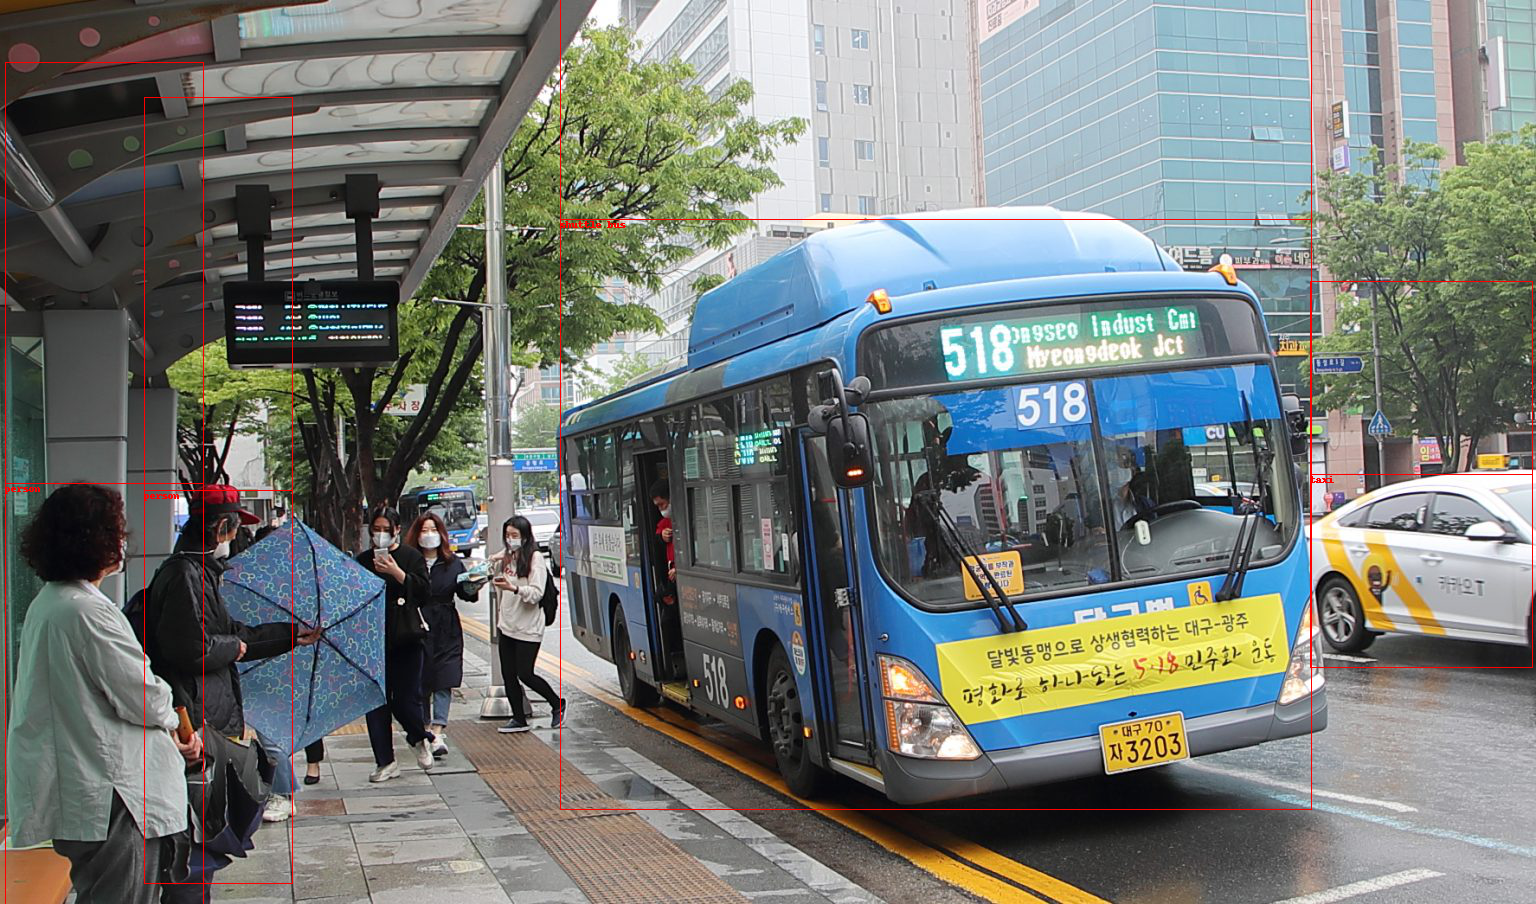

In [72]:
img